# Домашнее задание "Продвинутая линейная алгебра".

### Уровень 0:

Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!


In [1]:
import numpy as np

a) Диагональная, ортогональная, но не единичная(!)

In [2]:
A = np.array([[1, 0], [0, -1]])
A

array([[ 1,  0],
       [ 0, -1]])

In [3]:
# проверка
A.T @ A

array([[1, 0],
       [0, 1]])

b) Верхнетреугольная, ортогональная

In [5]:
B = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, 1]])
B

array([[-1,  0,  0],
       [ 0, -1,  0],
       [ 0,  0,  1]])

In [6]:
# проверка
B.T @ B

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

c) Нижнетреугольная, ортогональная

In [7]:
C = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, -1]])
C

array([[-1,  0,  0],
       [ 0,  1,  0],
       [ 0,  0, -1]])

In [8]:
# проверка
C.T @ C

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

d) Матрица, у которой определитель = 1, и все элементы не равны 0

In [9]:
d = np.array([[-1, 2, 1], [2, -1, 2], [-1, 3, 2]], dtype=np.float32)
det = np.linalg.det(d)
print(d)
print(det)

[[-1.  2.  1.]
 [ 2. -1.  2.]
 [-1.  3.  2.]]
1.0


Найдите собственные значения и собственные вектора матриц:

In [10]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [11]:
w, v = np.linalg.eig(m)

In [12]:
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 1.0
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
Собственное значение 4.0
соответствующий ему собственный вектор [-0.70710678 -0.70710678]


### Уровень 1:

Найдите спектральное разложение матрицы:

In [13]:
m = np.array([[1, 2],
              [2,3]])
print(m)

[[1 2]
 [2 3]]


In [14]:
a, U = np.linalg.eig(m)
print('Eigenvalues:')
print(np.array(a, dtype=float))
print('\nEigenvectors:')
print(U)

Eigenvalues:
[-0.23606798  4.23606798]

Eigenvectors:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


спектральное разложение:

In [15]:
np.diag(a)

array([[-0.23606798,  0.        ],
       [ 0.        ,  4.23606798]])

Проверка:

In [16]:
U @ (np.diag(a) @ np.linalg.inv(U))

array([[1., 2.],
       [2., 3.]])

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*





--------------------------------------------------------------------------------

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации.
Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.

В качестве справки можно использовать:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html - Документация по PCA

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html - Документация по MSE

Картинки цифр можно взять отсюда - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html


In [17]:
from sklearn.datasets import load_digits
digits = load_digits()

In [18]:
print(digits.data.shape)

(1797, 64)


In [19]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [20]:
import matplotlib.pyplot as plt 

<Figure size 432x288 with 0 Axes>

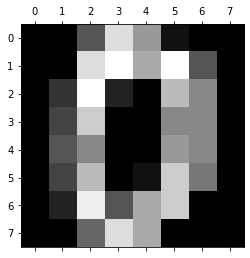

In [21]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [22]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [23]:
X = digits['data']

In [24]:
Y = digits['target']

In [29]:
def pca_component_error(n_components):
    pca = PCA(n_components=n_components)
    XPCAreduced = pca.fit_transform(X)
    Xrestored = pca.inverse_transform(XPCAreduced)
    mse = mean_squared_error(digits['data'], Xrestored)
    return mse

In [30]:
pca_component_error(3)

11.206800697129426

In [31]:
pca_comp_list = np.array([[num, pca_component_error(num)] for num in range(1,31)])
# pca_comp_list = [[num, pca_component_error(num)] for num in range(1,31)]
pca_comp_list

array([[ 1.        , 15.97767846],
       [ 2.        , 13.4210122 ],
       [ 3.        , 11.2068007 ],
       [ 4.        ,  9.62798641],
       [ 5.        ,  8.54244762],
       [ 6.        ,  7.61939087],
       [ 7.        ,  6.80916804],
       [ 8.        ,  6.12180099],
       [ 9.        ,  5.49228833],
       [10.        ,  4.91430936],
       [11.        ,  4.46894756],
       [12.        ,  4.04230674],
       [13.        ,  3.7002994 ],
       [14.        ,  3.36731559],
       [15.        ,  3.09202149],
       [16.        ,  2.82730624],
       [17.        ,  2.57980341],
       [18.        ,  2.34548485],
       [19.        ,  2.15432774],
       [20.        ,  1.98428743],
       [21.        ,  1.81735959],
       [22.        ,  1.66769184],
       [23.        ,  1.52360963],
       [24.        ,  1.38796863],
       [25.        ,  1.25736878],
       [26.        ,  1.14534064],
       [27.        ,  1.0372995 ],
       [28.        ,  0.94055367],
       [29.        ,

Text(0, 0.5, 'Mean square error')

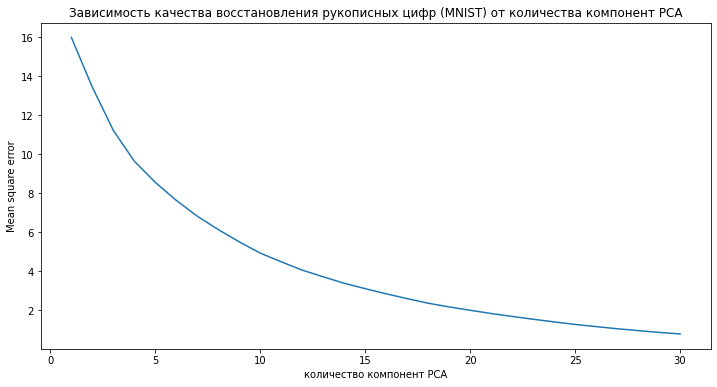

In [32]:
plt.figure(figsize=(12,6))
plt.plot(pca_comp_list[:,0], pca_comp_list[:,1])
plt.title('Зависимость качества восстановления рукописных цифр (MNIST) от количества компонент PCA')
plt.xlabel('количество компонент PCA')
plt.ylabel('Mean square error')